In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('11-iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop("Id",axis=1)

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label=LabelEncoder()

In [8]:
df["Species"]=label.fit_transform(df["Species"])

In [9]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=15,test_size=0.25)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
gnb=GaussianNB()

In [19]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [20]:
y_pred=gnb.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: ", accuracy_score(y_pred, y_test))
print("classification report: ", classification_report(y_pred, y_test))

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score:  1.0
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



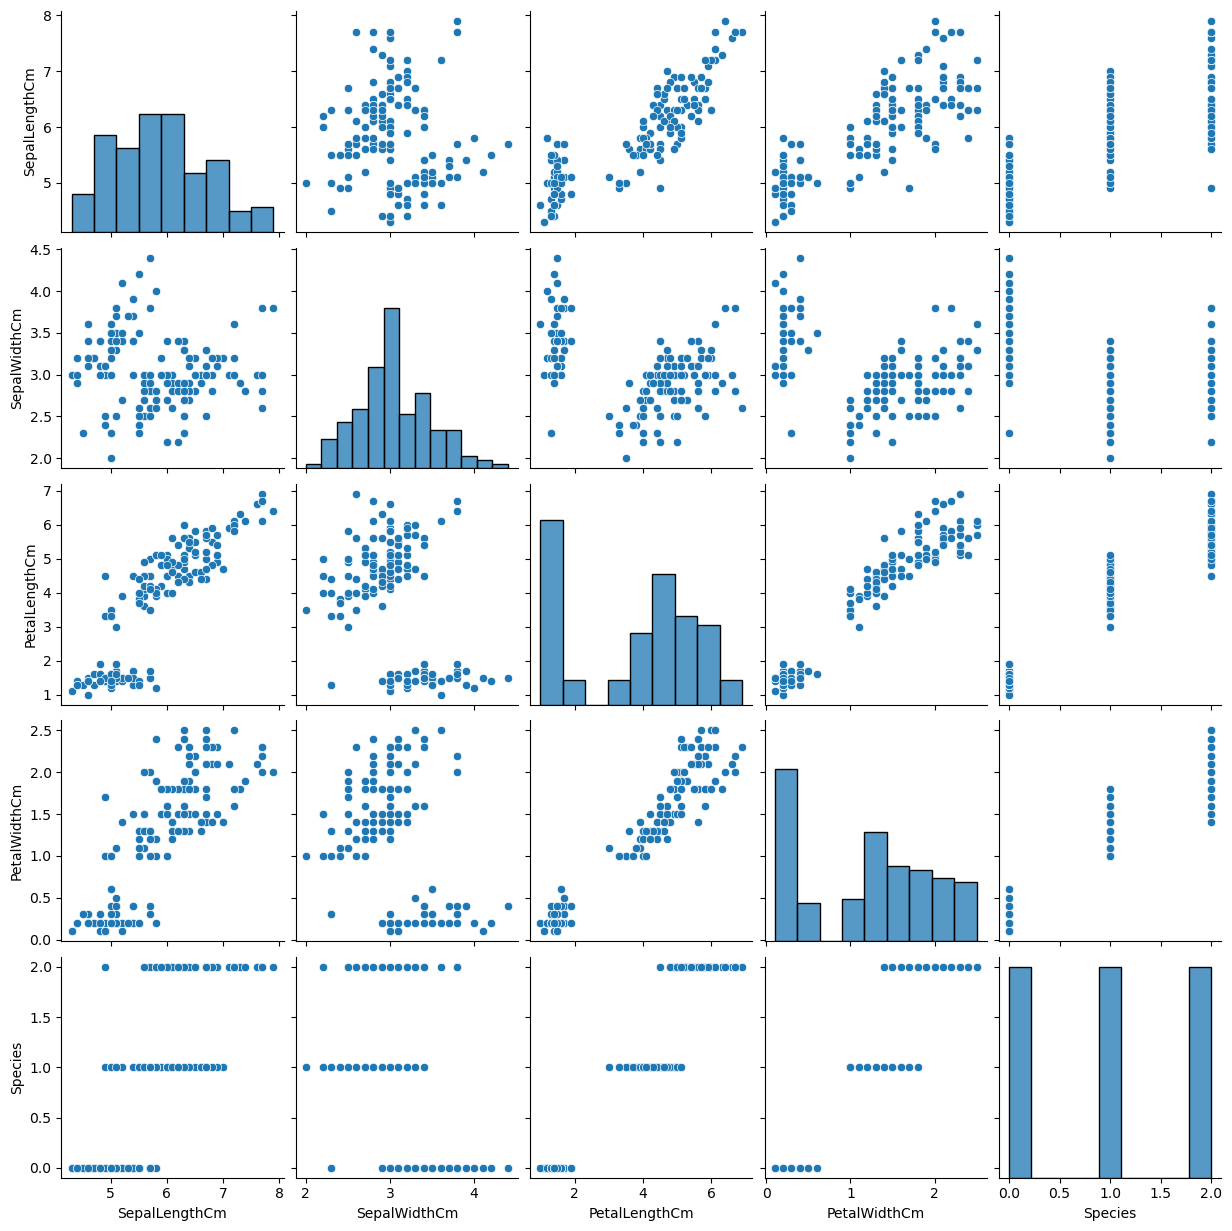

In [23]:
sns.pairplot(df)